<a href="https://colab.research.google.com/github/BohdanBuhrii/enemy-detection/blob/master-thesis/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def set_axis(ax):
  ax.set_axisbelow(True)
  ax.grid()

# Train YOLOv5 (n, s, m)

## Training results

In [ ]:
results_n = pd.read_csv('/content/drive/MyDrive/models/1024/1682611017/yolov5n/runs/train/exp/results.csv').rename(columns=lambda x: x.strip())
results_s = pd.read_csv('/content/drive/MyDrive/models/1024/1682611017/yolov5s/runs/train/exp/results.csv').rename(columns=lambda x: x.strip())
results_m = pd.read_csv('/content/drive/MyDrive/models/1024/1682611017/yolov5m/runs/train/exp/results.csv').rename(columns=lambda x: x.strip())
results_s.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.095658,0.093699,0.031739,0.76992,0.16719,0.14375,0.042771,0.079702,0.070234,0.027319,0.070423,0.003286,0.003286
1,1,0.071546,0.065620,0.024239,0.80157,0.21451,0.23294,0.073282,0.068531,0.037472,0.023434,0.040160,0.006358,0.006358
2,2,0.066899,0.059538,0.023457,0.23253,0.48148,0.43603,0.229790,0.069347,0.048949,0.021810,0.009634,0.009165,0.009165
3,3,0.057320,0.054532,0.021512,0.70623,0.59925,0.64122,0.276610,0.048230,0.032951,0.019063,0.008812,0.008812,0.008812
4,4,0.049006,0.050439,0.019006,0.39123,0.71834,0.61331,0.301510,0.052485,0.037921,0.016615,0.008812,0.008812,0.008812


In [ ]:
columns = {'train/box_loss': 'box loss',
           'train/obj_loss': 'obj. loss',
           'train/cls_loss': 'class loss',
           'metrics/precision': 'precision',
           'metrics/recall' : 'recall',
           #'metrics/mAP_0.5' : 'mAP_0.5',
           'metrics/mAP_0.5:0.95' : 'mAP_0.5:0.95',
           #'val/box_loss',
           #'val/obj_loss',
           #'val/cls_loss'
           }

In [ ]:
def plot_metric(ax, metric):
    set_axis(ax)
    ax.set_title(columns[metric])
    ax.plot(results_n[metric], 'o-', label='yolov5n', markersize=3)
    ax.plot(results_s[metric], 'o-', label='yolov5s', markersize=3)
    ax.plot(results_m[metric], 'o-', label='yolov5m', markersize=3)

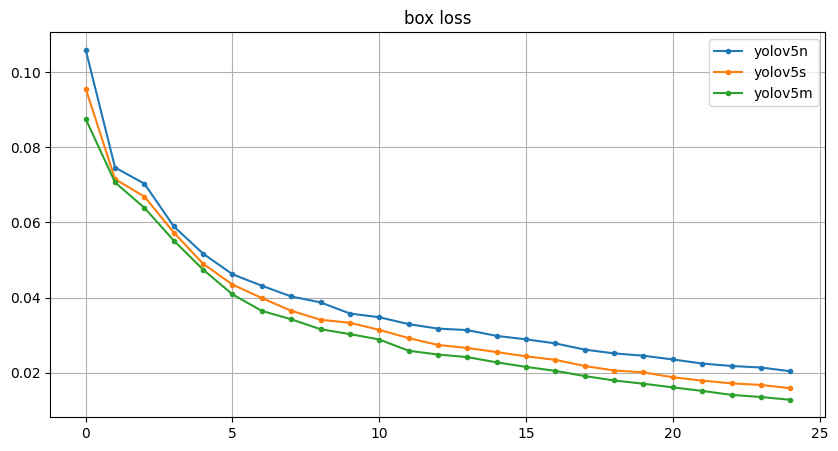

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

plot_metric(ax1, 'train/box_loss')
ax1.legend()

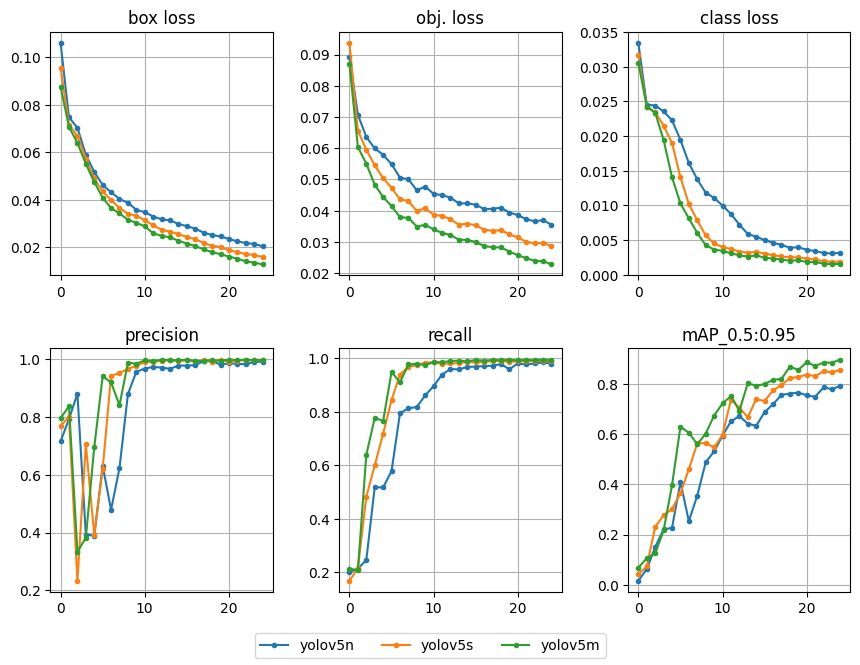

In [ ]:
shape = (2, 3)
fig, axs = plt.subplots(*shape)
fig.set_size_inches(10, 7)

for ax, column in zip(fig.axes, columns):
    plot_metric(ax, column)

lines, labels = fig.axes[0].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', ncol=3)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
plt.savefig("/content/drive/MyDrive/plots/results.pdf", bbox_inches = 'tight', pad_inches = 0)

# Missing labels

In [ ]:
results_s_missed_15 = pd.read_csv('/content/drive/MyDrive/models/1024/1682611017/yolov5s/poisoned/missing/runs/train/exp/results.csv').rename(columns=lambda x: x.strip())
results_s_missed_50 = pd.read_csv('/content/drive/MyDrive/models/1024/1682611017/yolov5s/poisoned/missing_05/runs/train/exp/results.csv').rename(columns=lambda x: x.strip())

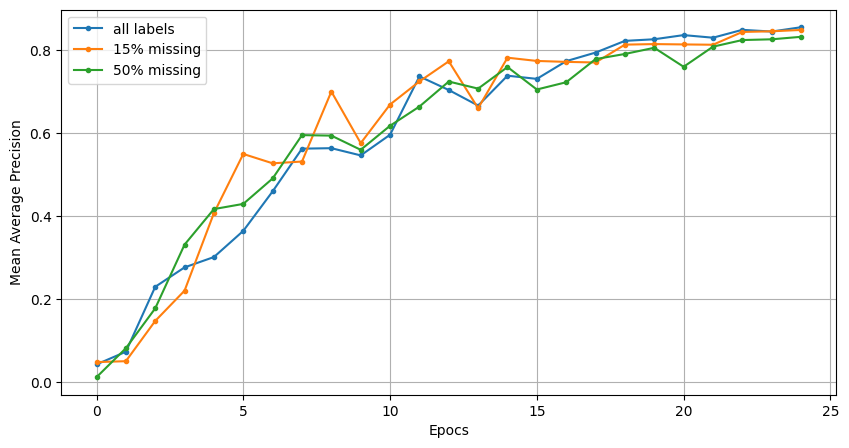

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
mAP = 'metrics/mAP_0.5:0.95'

set_axis(ax1)

ax1.plot(results_s[mAP], 'o-', label='all labels', markersize=3)
ax1.plot(results_s_missed_15[mAP], 'o-', label='15% missing', markersize=3)
ax1.plot(results_s_missed_50[mAP], 'o-', label='50% missing', markersize=3)

ax1.set_ylabel('Mean Average Precision')
ax1.set_xlabel('Epocs')

ax1.legend()

plt.savefig("/content/drive/MyDrive/plots/missing.pdf", bbox_inches = 'tight', pad_inches = 0)

## mAP comparison

In [ ]:
def get_mAP(results):
    return (results[mAP[0]].values[-1], results[mAP[1]].values[-1])

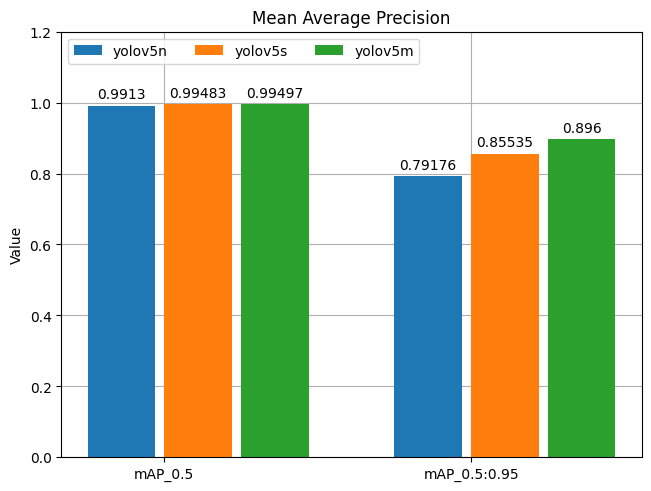

In [ ]:
mAP_labels = ('mAP_0.5', 'mAP_0.5:0.95')
mAP = ('metrics/mAP_0.5', 'metrics/mAP_0.5:0.95')
penguin_means = {
    'yolov5n': get_mAP(results_n),
    'yolov5s': get_mAP(results_s),
    'yolov5m': get_mAP(results_m),
}

x = np.arange(len(mAP_labels))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
set_axis(ax)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, label=attribute,  align='edge', width=0.22)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Mean Average Precision')
ax.set_xticks(x + width, mAP_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.savefig("/content/drive/MyDrive/plots/map-bar.pdf", bbox_inches = 'tight', pad_inches = 0)

# mAP vs % poisoned

In [ ]:
poison_rate = [0, 0.2, 1, 5]
ticks = np.arange(len(poison_rate))

In [ ]:
def plot_poison_rate(mAP50_clean, mAP95_clean, mAP50_poisoned, mAP95_poisoned):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)

    set_axis(ax1)

    ax1.set_ylabel('Mean Average Precision')
    ax1.set_xlabel('% of training data poisoned')
    ax1.xaxis.set_ticks(ticks) #set the ticks to be a
    ax1.xaxis.set_ticklabels(poison_rate)

    ax1.plot(ticks, mAP50_poisoned, 'o-', color='red', label='mAP50 poisoned')
    ax1.plot(ticks, mAP50_clean, '--', color='red', label='mAP50 clean')

    ax1.plot(ticks, mAP95_poisoned, 'o-', color='blue', label='mAP95 poisoned')
    ax1.plot(ticks, mAP95_clean, '--', color='blue', label='mAP95 clean')

    ax1.legend()

In [ ]:
# clean model, 0.2%, 1%, 5%
mAP50_poisoned = [0.948, 0.852,  0.737, 0.725]
mAP95_poisoned = [0.761, 0.68, 0.63, 0.641]

mAP50_clean = [0.99 for _ in ticks]
mAP95_clean = [0.87 for _ in ticks]

### Simple poisoning

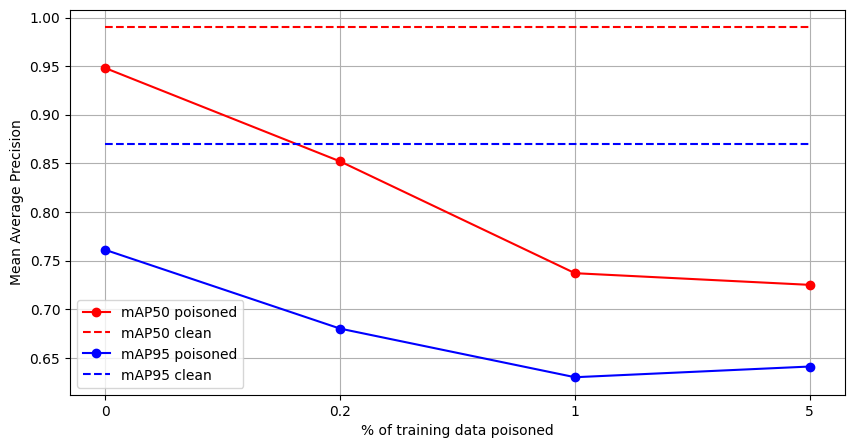

In [ ]:
plot_poison_rate(mAP50_clean, mAP95_clean, mAP50_poisoned, mAP95_poisoned)
plt.savefig("/content/drive/MyDrive/plots/robustness.pdf", bbox_inches = 'tight', pad_inches = 0)

### Stealthy poisoning

In [ ]:
mAP50_poisoned = [0.992, 0.992,  0.991, 0.773]
mAP95_poisoned = [0.871, 0.872, 0.866, 0.674]

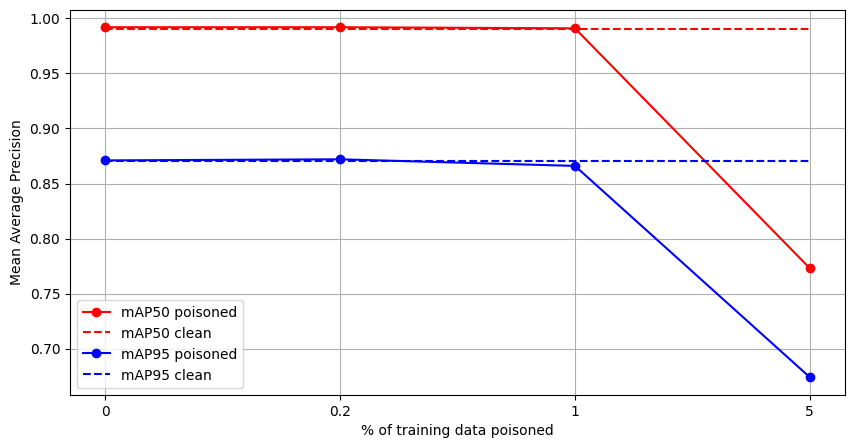

In [ ]:
plot_poison_rate(mAP50_clean, mAP95_clean, mAP50_poisoned, mAP95_poisoned)
plt.savefig("/content/drive/MyDrive/plots/robustness-stealthy.pdf", bbox_inches = 'tight', pad_inches = 0)